# 📄 Descrição Geral
O script utiliza o algoritmo **DBSCAN** (**Density-Based Spatial Clustering of Applications with Noise**) para realizar clustering nos dados. Ao contrário do **K-Means**, o **DBSCAN** não requer a definição do número de clusters previamente e é eficaz na detecção de **outliers** ou **ruídos** nos dados. O script trabalha com dois datasets diferentes: um gerado sinteticamente (**make_moons**) e o conjunto de dados **Iris**. O **PCA** é utilizado para reduzir a dimensionalidade e facilitar a visualização dos clusters formados. O **DBSCAN** pode identificar pontos de ruído e agrupá-los em clusters baseados em densidade.

---

# 🎯 Objetivo
O objetivo deste script é:

1. **Aplicar o DBSCAN** para realizar a **clusterização** em dois datasets.
2. **Visualizar os clusters** formados e identificar os pontos de **ruído**.
3. **Reduzir a dimensionalidade** dos dados utilizando **PCA** para facilitar a visualização em 2D.

<br><br>

---

<br>

# 🔢 Bloco 1: Imports e Geração de Dados Sintéticos 🌱

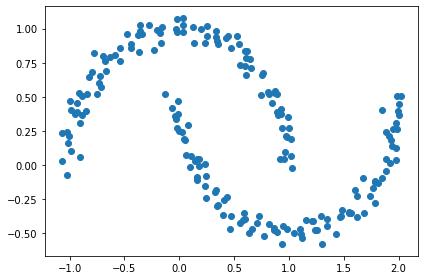

In [1]:
# Imports
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
%matplotlib inline

# Gerando os dados
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
plt.scatter(X[:,0], X[:,1])
plt.tight_layout()
plt.show()

### 🔍 Objetivo:
- Importar as **bibliotecas** necessárias para o **DBSCAN**, **visualização** e **geração de dados sintéticos**.
- Gerar um **dataset sintético** com a função **make_moons** e visualizá-lo em um gráfico de dispersão.

---

# ⚙️ Bloco 2: Construção do Modelo DBSCAN e Ajuste dos Parâmetros 🔧

In [2]:
# Construção do modelo
modelo = DBSCAN(eps = 0.2, min_samples = 5, metric = 'euclidean')
modelo

DBSCAN(eps=0.2)

### 🔍 Objetivo:
- Definir o modelo **DBSCAN** com os parâmetros **eps** e **min_samples** ajustados.
  - O parâmetro **eps** define a distância máxima entre pontos para que sejam considerados vizinhos.
  - O parâmetro **min_samples** especifica a quantidade mínima de pontos em uma vizinhança para formar um **cluster**.

---

# 📊 Bloco 3: Aplicação do Modelo DBSCAN e Visualização dos Clusters

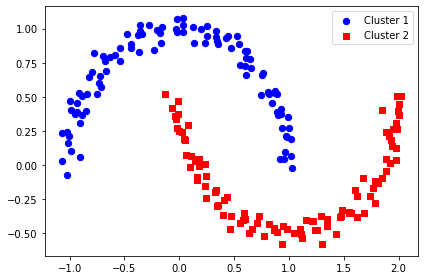

In [3]:
# Fit do modelo
y_db = modelo.fit_predict(X)

# Plot
plt.scatter(X[y_db==0,0], X[y_db==0,1], c = 'blue', marker = 'o', s = 40, label = 'Cluster 1')
plt.scatter(X[y_db==1,0], X[y_db==1,1], c = 'red', marker = 's', s = 40, label = 'Cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

### 🔍 Objetivo:
- Aplicar o modelo **DBSCAN** aos dados sintéticos.
- Visualizar os **clusters** formados em um gráfico, com pontos diferentes representando os clusters identificados e seus respectivos **rótulos**.

---

# 🔍 Bloco 4: DBSCAN no Dataset Iris 🌸

In [4]:
# Imports
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
%matplotlib inline

# Carregando os dados
iris = load_iris()

# Primeira versão do modelo
dbscan_v1 = DBSCAN()
# Fit
dbscan_v1.fit(iris.data)

# Labels
dbscan_v1.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

### 🔍 Objetivo:
- Carregar o **dataset Iris** e aplicar o algoritmo **DBSCAN** para identificar clusters nos dados.
- Visualizar os **rótulos** dos clusters gerados para cada amostra do conjunto **Iris**.

---

# 🗺️ Bloco 5: Visualização dos Resultados com PCA 📐

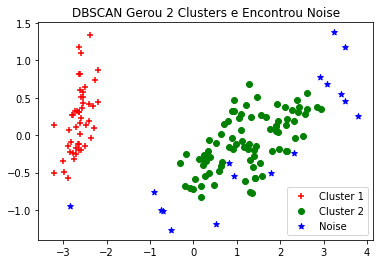

In [5]:
# Reduzindo a Dimensionalidade
pca = PCA(n_components = 2).fit(iris.data)

# Fit
pca_2d = pca.transform(iris.data)

# Plot
for i in range(0, pca_2d.shape[0]):
    if dbscan_v1.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
    elif dbscan_v1.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')
    elif dbscan_v1.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = '*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN Gerou 2 Clusters e Encontrou Noise')
plt.show()


### 🔍 Objetivo:
- Aplicar o **PCA** para reduzir a dimensionalidade do conjunto de dados **Iris** e visualizá-lo em um gráfico 2D.
- Identificar os pontos de **ruído** (marcados como **-1**) e os **clusters** gerados pelo **DBSCAN**.

---

# 🔄 Bloco 6: Ajuste de Parâmetros e Nova Execução do DBSCAN 🔄

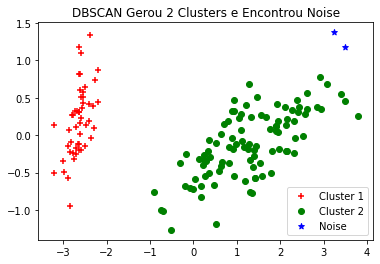

In [6]:
# Segunda versão do modelo
dbscan_v2 = DBSCAN(eps = 0.8, min_samples = 4, metric = 'euclidean')
dbscan_v2.fit(iris.data)

# Plot
for i in range(0, pca_2d.shape[0]):
    if dbscan_v2.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
    elif dbscan_v2.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')
    elif dbscan_v2.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = '*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN Gerou 2 Clusters e Encontrou Noise')
plt.show()

# 🔍 Objetivo:
- Ajustar os parâmetros **eps** e **min_samples** do **DBSCAN** para obter diferentes resultados de **clustering**.
- Visualizar novamente os **clusters** formados e os **pontos de ruído** com os parâmetros ajustados.

<br><br>

---

<br>

# 🏁 Conclusão:

Este script demonstrou a utilização do **DBSCAN** para realizar **clustering** em dois conjuntos de dados: 

1. O gerado sinteticamente com a função **make_moons**.
2. O conjunto **Iris**.

Através da análise de **ruído** e **clusters**, foi possível observar como o **DBSCAN** identifica regiões de alta densidade e lida com **outliers**, que são marcados como **ruído**. 

Além disso, a aplicação do **PCA** facilitou a visualização dos resultados em **2D**. O ajuste dos parâmetros **eps** e **min_samples** foi crucial para a qualidade do agrupamento, destacando a **flexibilidade** do **DBSCAN** em relação a métodos como o **K-Means**.
